Import dependencies

In [106]:
import pandas as pd

Get Data file

In [107]:
df = pd.read_csv("laptop_price.csv", encoding="latin-1")

In [108]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


Feature Engineering

In [109]:
# drop unimportant features - product
df = df.drop("Product", axis=1)

In [110]:
# one hot encoding - categorical -> numerical data (sparse representation)
# default dtype for pd.get_dummies() method is boolean hence mention the type explicitly
df = df.join(pd.get_dummies(df.Company, dtype=int))
df = df.drop("Company", axis=1)

In [111]:
# one hot encoding - categorical -> numerical data (sparse representation)
# default dtype for pd.get_dummies() method is boolean hence mention the type explicitly
df = df.join(pd.get_dummies(df.TypeName, dtype=int))
df = df.drop("TypeName", axis=1)

In [112]:
df

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,0,0,1,0
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,0,0,0,0,0,0,0,0,1,0
2,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,0,0,0,0,0,0,0,1,0,0
3,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,0,0,0,0,0,0,0,0,1,0
4,5,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,...,0,0,0,0,1,0,0,0,0,0
1299,1317,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,...,0,0,0,0,1,0,0,0,0,0
1300,1318,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,...,0,0,0,0,0,0,0,1,0,0
1301,1319,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,...,0,0,0,0,0,0,0,1,0,0


In [113]:
# scrap the required numerical values - Screen Width and Screen Height from ScreenResolution string
# Example: from "IPS Panel Retina Display 2560x1600" string we split by whitespaces -> take out last item x[-1] which is 2560x1600 -> then we split by x -> take out x[0] = Screen Width and x[1] = Screen Height

df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])

df = df.drop("ScreenResolution", axis=1)

In [114]:
# scrap the required numerical values - CPU Brand and CPU Frequency from Cpu string
# Example: from "Intel Celeron Dual Core N3050 1.6GHz" string we split by whitespaces -> take out last item x[-1] which is 1.6GHz -> take out x[0] = Intel 

df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])

df = df.drop("Cpu", axis=1)

In [115]:
# Example: from "1.6GHz" we slice out value after 3 characters from last x[:-3]
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]

In [116]:
# Example: from "8GB" we slice out value after 2 characters from last x[:-2]
df["Ram"] = df["Ram"].str[:-2]

In [117]:
# we set numerical data types for Screen Width, Screen Height, Ram and CPU Frequency features
df["Ram"] = df["Ram"].astype("int")
df["CPU Frequency"] = df["CPU Frequency"].astype("float")
df["Screen Width"] = df["Screen Width"].astype("int")
df["Screen Height"] = df["Screen Height"].astype("int")

In [118]:
# scrap the required numerical values - Memory Amount and Memory Type from Memory 
# Example: from "128GB SSD" string we split by whitespaces -> take out item x[0] which is 128GB -> take out x[1] = SSD 

df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])

In [119]:
# to have consistent approach we crate a function to convert all the memory values to MBs(MegaByte)
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [120]:
# we apply turn_memory_into_MB function to convert all the memory values to MBs(MegaByte)
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)

In [121]:
df = df.drop("Memory", axis=1)

In [122]:
# Example: from "1.37kg" we slice out value after 2 characters from last x[:-2] which is 1.37
df["Weight"] = df["Weight"].str[:-2]

In [123]:
# we set numerical data type for Weight features
df["Weight"] = df["Weight"].astype("float")

In [124]:
# Example: from "Intel Iris Plus Graphics 640" string we split by whitespaces -> take out item x[0] which is Intel -> take out x[1] = SSD 
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])
df = df.drop("Gpu", axis=1)

In [125]:
# one hot encoding - categorical -> numerical data (sparse representation) for Operating System feature
# default dtype for pd.get_dummies() method is boolean hence mention the type explicitly
df = df.join(pd.get_dummies(df.OpSys, dtype=int))
df = df.drop("OpSys", axis=1)

In [126]:
# we got similar names for CPU and GPU for example intel hence we change the CPU Brand suffixed with _CPU and do one hot encoding

cpu_categories = pd.get_dummies(df["CPU Brand"]).astype('int32')
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [127]:
# we got similar names for CPU and GPU for example intel hence we change the CPU Brand suffixed with _GPU and do one hot encoding

gpu_categories = pd.get_dummies(df["GPU Brand"]).astype('int32')
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

In [128]:
df

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1299,1317,13.3,16,1.30,1499.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1300,1318,14.0,2,1.50,229.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1301,1319,15.6,6,2.19,764.00,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [132]:
# one hot encoding for memory type feature  

memory_type_categories = pd.get_dummies(df["Memory Type"]).astype('int32')

df = df.join(memory_type_categories)
df = df.drop("Memory Type", axis=1)

In [133]:
df

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,Flash,HDD,Hybrid,SSD
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1299,1317,13.3,16,1.30,1499.00,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1300,1318,14.0,2,1.50,229.00,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
1301,1319,15.6,6,2.19,764.00,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


<Axes: >

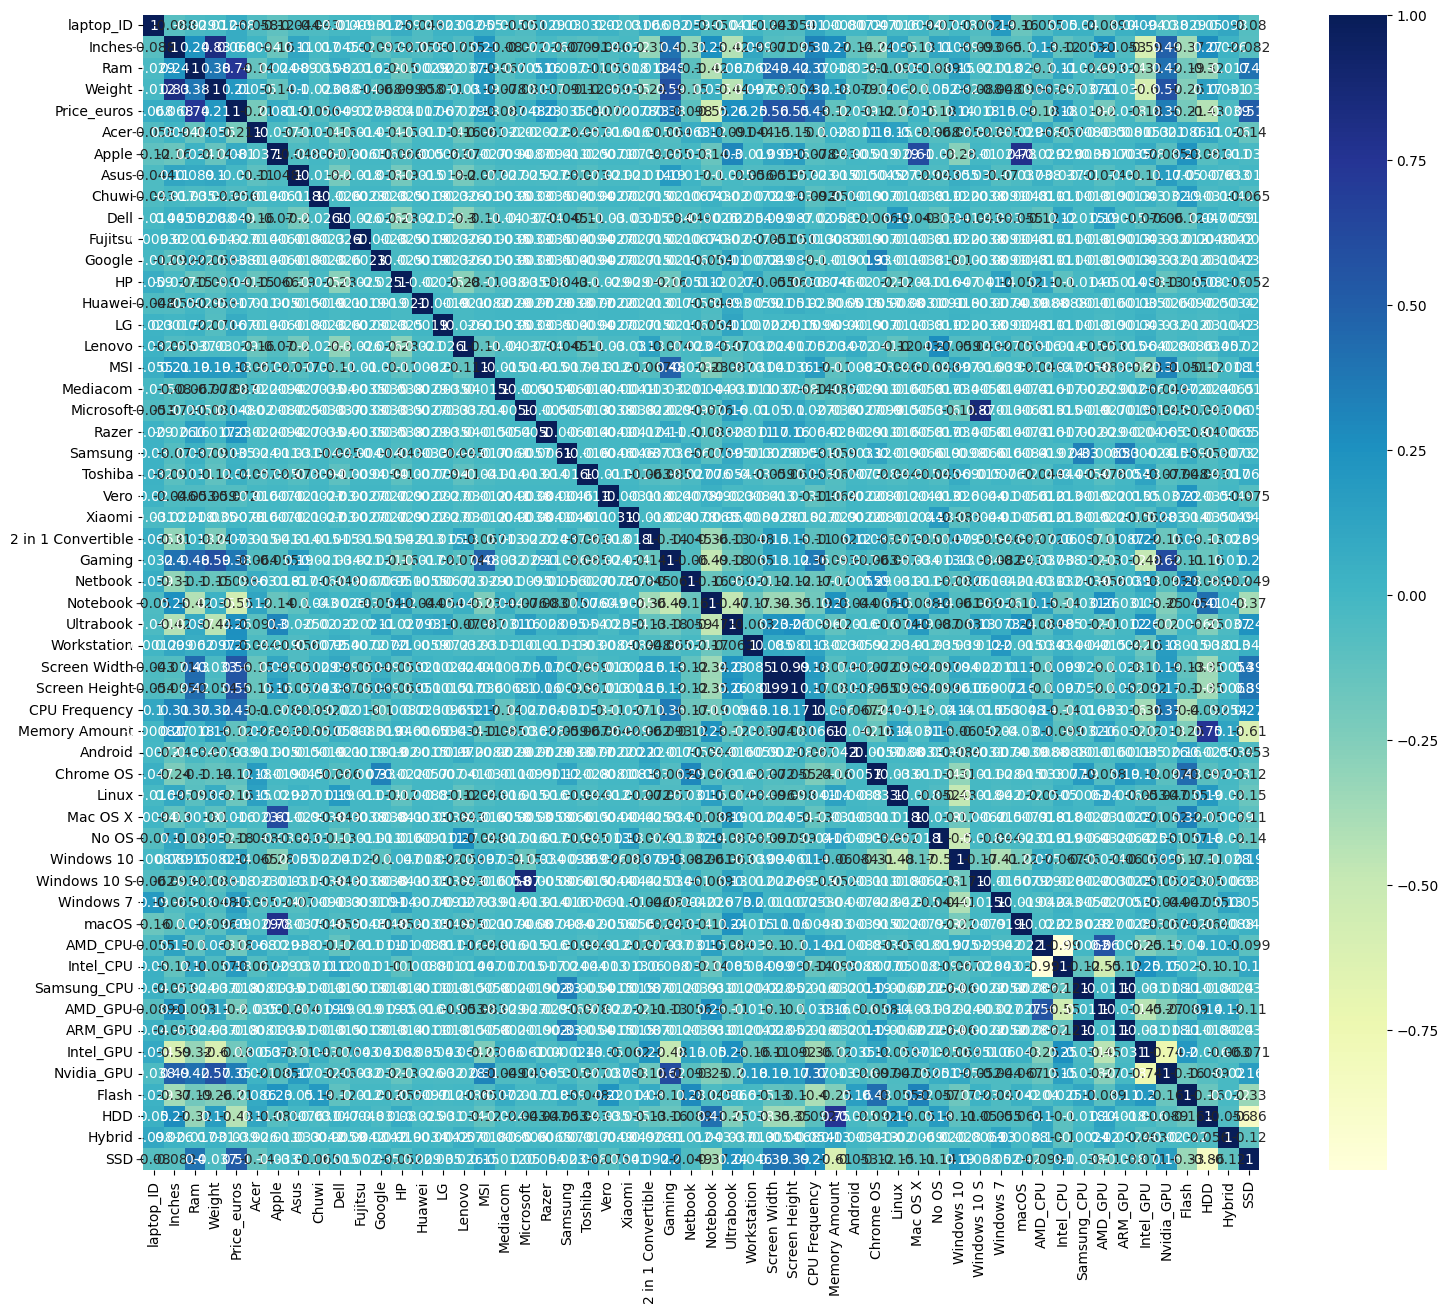

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [135]:
# we sort the correlation values with respect to Price_euros feature
target_correlations = df.corr()['Price_euros'].apply(abs).sort_values()

In [136]:
target_correlations

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_GPU               0.018431
Samsung_CPU           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Hybrid                0.039386
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS   

In [137]:
# we select the top 20 features which are highly correlated with Price_euros feature
selected_features = target_correlations[-21:].index

In [138]:
selected_features

Index(['MSI', 'AMD_CPU', 'Intel_CPU', 'Intel_GPU', 'AMD_GPU', 'Acer', 'Weight',
       'Flash', 'Razer', 'Workstation', 'Ultrabook', 'Nvidia_GPU', 'Gaming',
       'HDD', 'CPU Frequency', 'SSD', 'Notebook', 'Screen Height',
       'Screen Width', 'Ram', 'Price_euros'],
      dtype='object')

In [139]:
limited_df = df[selected_features]

In [140]:
limited_df

,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,Acer,Weight,Flash,Razer,Workstation,...,Nvidia_GPU,Gaming,HDD,CPU Frequency,SSD,Notebook,Screen Height,Screen Width,Ram,Price_euros
0,0,0,1,1,0,0,1.37,0,0,0,...,0,0,0,2.3,1,0,1600,2560,8,1339.69
1,0,0,1,1,0,0,1.34,1,0,0,...,0,0,0,1.8,0,0,900,1440,8,898.94
2,0,0,1,1,0,0,1.86,0,0,0,...,0,0,0,2.5,1,1,1080,1920,8,575.00
3,0,0,1,0,1,0,1.83,0,0,0,...,0,0,0,2.7,1,0,1800,2880,16,2537.45
4,0,0,1,1,0,0,1.37,0,0,0,...,0,0,0,3.1,1,0,1600,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,1,1,0,0,1.80,0,0,0,...,0,0,0,2.5,1,0,1080,1920,4,638.00
1299,0,0,1,1,0,0,1.30,0,0,0,...,0,0,0,2.5,1,0,1800,3200,16,1499.00
1300,0,0,1,1,0,0,1.50,1,0,0,...,0,0,0,1.6,0,1,768,1366,2,229.00
1301,0,0,1,0,1,0,2.19,0,0,0,...,0,0,1,2.5,0,1,768,1366,6,764.00


<Axes: >

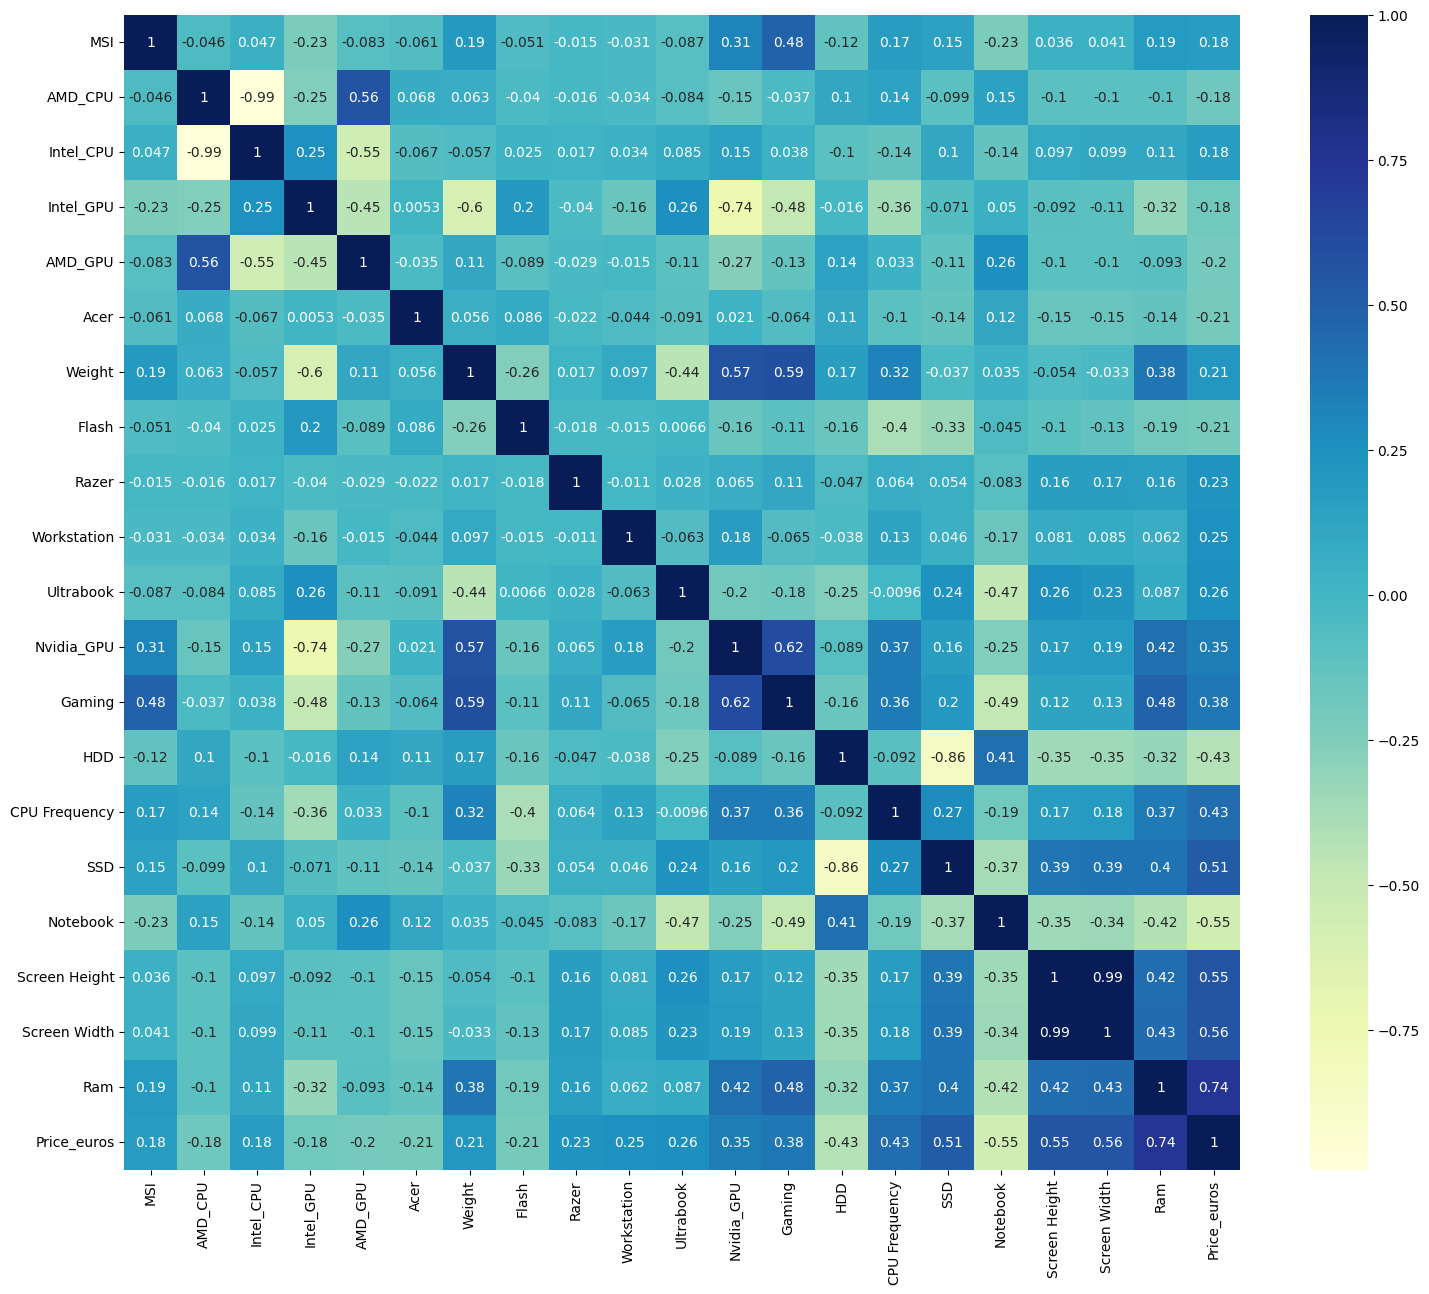

In [141]:
# we plot the correlation matrix for the selected features
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [142]:
# import StandardScaler for scaling the features
# import train_test_split for splitting the data into training and testing sets
# import RandomForestRegressor for training the model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# we split the data into features and target
X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]

# we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# we scale the features
scaler = StandardScaler()

# we scale the training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
# we train the model
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [145]:
RandomForestRegressor()

RandomForestRegressor()

In [146]:
# we evaluate the model
forest.score(X_test_scaled, y_test)

0.8058853821433393

In [147]:
# we predict the target values
y_pred = forest.predict(X_test_scaled)

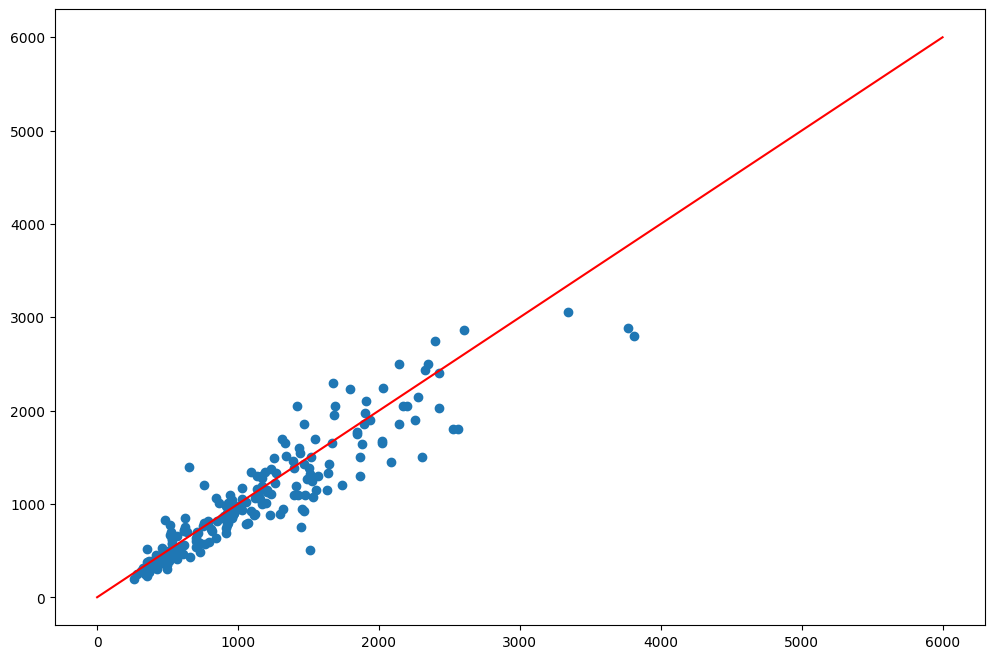

In [148]:
# we plot the predicted values against the actual values
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="red")

In [152]:
# scaling the new data
X_new_scaled = scaler.transform([X_test.iloc[1]])

C:\Users\rrajeshrajappan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [153]:
# predicting the target value for the new data
forest.predict(X_new_scaled)

array([1026.24416667])

In [155]:
# actual target value for the new data
y_test.iloc[1]

1049.0